


##                        Opening a high end steakhouse restaurant in 

#                             Moore park, Central Toronto


Toronto is the capital of the province of Ontario and it is a major Canadian city and it is located right next to Lake Ontario’s. It's a very dynamic metropolitan area with a population of 2.7 million as of 2016. Toronto is an urban city with diverse population and it is an important destination for immigrants to Canada as well. More than 50 percent of residents belong to minority population group which are pretty much are spread out across the city. Toronto has over 200 distinct ethnic origins and while the majority of the population in the city speak English as their primary language, over 160 languages are spoken in the city. The city has 10 boroughs and about 103 neighborhoods.

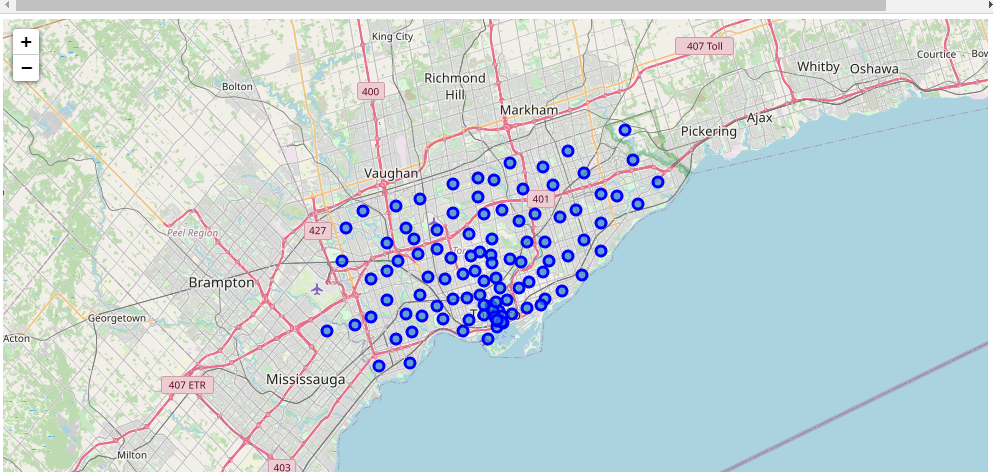


### Business problem and Methodology

Finding the right location is a very important factor to open a restaurant. Since in this project I am targeting Toronto City I need to analyze a borough that suits best for to open a high-end steakhouse restaurant. This type of restaurant can be close to city center or suburb but in observation it is best open this type of restaurant close to shopping center, mall or city center. Since it would be a high-end restaurant it must be located in high income class neighborhood. Moore park in Central Toronto seems to be more appropriate neighborhood for this type restaurant.    

### Exploring and cleaning data sets city of Toronto

On this project I am using three data sets, the Boroughs data, Latitude and Longitude, and population data. After combining the three data sets on unique value column now we can analyze the combined data and to find where could make more sense to open a high-end steak house. There are 9 neighborhoods in Central Toronto borough and there are about 

### Result and conclusion section

Based on analysis below we can see the frequency of restaurants in Moore Park in Toronto is about 0.25 and it is a neighborhood with high income household. Additionally, on the fifth cluster we can see that the restaurants are first most common venues in the area. Thus, there would be a decent competition in this neighborhood but quality and customer happiness will win always.








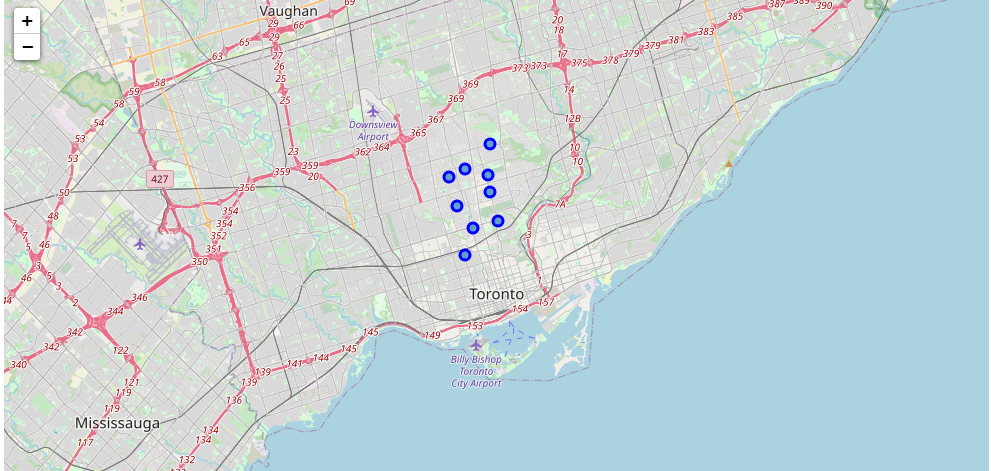



 Based on below analysis we found out that Central Toronto contains some neighborhoods with high income households 

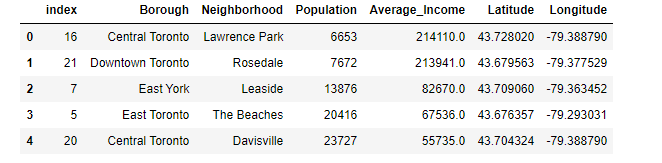

 Moore Park is one of the neighborhoods in Central Toronto borough that has restaurant as the first most common venue with frequency or 0.25 

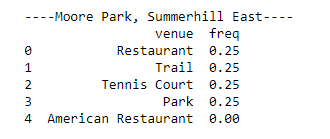



On the k-means cluster based on anlysis we figured out that the fifth cluster of the Central which Moor Park has restuarant as most common venue and thus it the very favorable location to open our steak house house restuarant.

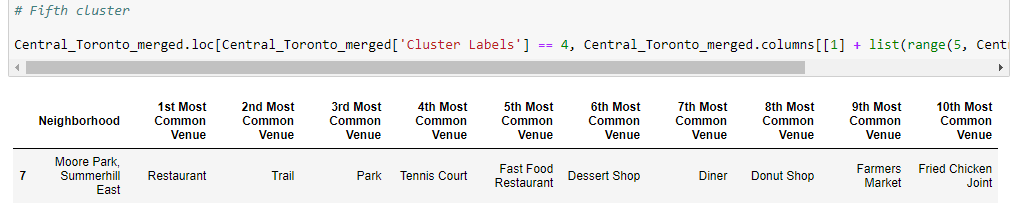


In [184]:
# Loading all the necessary labraries

import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [185]:
# Uploading Boroughs with Postal Code 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import requests
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

# Creating a dataframe object from listoftuples
df1 = pd.DataFrame(df[0]) 

df1.columns = df1.iloc[0]
df1 = df1[1:]
print("Shape of data", df1.shape,"\n")
df1.head(10)

Shape of data (180, 3) 



,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"


In [186]:
#Getting only assigned Boroughs from the data

df1 = df1[df1.Borough != 'Not assigned']

print("shape of the data after eliminating not assigned Boroughs", df1.shape,"\n")

df1.head(10)

shape of the data after eliminating not assigned Boroughs (103, 3) 



,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill, Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


In [187]:
#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

df1['Neighborhood'].loc[(df1['Neighborhood'] == 'Not assigned')] = df1['Borough']
df1.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [188]:
#Getting the Latitute and Longitude for each postal code

import io
import requests
url_l = "https://cocl.us/Geospatial_data"
ll_df = requests.get(url_l).text
ll_df = pd.read_csv(io.StringIO(ll_df))
ll_df.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [195]:

# Combining Boroughs with Latitude and Longtitude data frames

toronto_df = pd.merge(df1,ll_df, on = "Postal Code")

toronto_df = toronto_df[['Borough','Neighborhood', 'Latitude','Longitude']]
toronto_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [194]:
# To open a high end steak house we to add Average income column and pick one of the high income Neightborhood

toronto_pop = pd.read_csv(r"C:\Users\T\Downloads\toronto_pop.csv",encoding= 'unicode_escape')

toronto_pop =toronto_pop.rename(columns = {'Name':'Neighborhood','Average Income':'Average_Income'})


toronto_df1 = pd.merge(toronto_df,toronto_pop, on = "Neighborhood")
toronto_df1 = toronto_df1[['Borough','Neighborhood','Population','Average_Income','Latitude','Longitude']]
toronto_df1 = toronto_df1.sort_values(by = ['Average_Income' ], ascending=False, na_position='last').reset_index() 

toronto_df1.head()


,index,Borough,Neighborhood,Population,Average_Income,Latitude,Longitude
0,16,Central Toronto,Lawrence Park,6653,214110.0,43.728020,-79.388790
1,21,Downtown Toronto,Rosedale,7672,213941.0,43.679563,-79.377529
2,7,East York,Leaside,13876,82670.0,43.709060,-79.363452
3,5,East Toronto,The Beaches,20416,67536.0,43.676357,-79.293031
4,20,Central Toronto,Davisville,23727,55735.0,43.704324,-79.388790


In [191]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [192]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [193]:
# Creating map of Toronto using folium library 

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [168]:
# Exploring Central Toronto borough 

b1 = 'Central Toronto'#'Central Toronto'

Central_Toronto = toronto_df[toronto_df['Borough'] == b1].reset_index(drop=True)
print(Central_Toronto.shape)
Central_Toronto

(9, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,Lawrence Park,43.728020,-79.388790
1,Central Toronto,Roselawn,43.711695,-79.416936
2,Central Toronto,Davisville North,43.712751,-79.390197
3,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
4,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
5,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
6,Central Toronto,Davisville,43.704324,-79.388790
7,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
8,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [129]:
address = b1+', Toronto, Canada'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(b1,latitude, longitude))

The geograpical coordinate of Central Toronto are 43.6534817, -79.3839347.


In [130]:
# create map of Central_Toronto using latitude and longitude values
map_Central_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Central_Toronto['Latitude'], Central_Toronto['Longitude'], Central_Toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Central_Toronto)  
    
map_Central_Toronto

In [131]:
# Searching for steakhouse in the neighbothood within 1000 meter radios

search_query = 'Steakhouse'
radius = 1000
LIMIT = 30
print(search_query)

Steakhouse


In [132]:
# Credentials for Foursquare website

CLIENT_ID = 'ABRUHMRTPBLF4BTPZOHADD5SDSUGBUOSSS2SYSPSH2SYLYZU' # your Foursquare ID
CLIENT_SECRET = 'BVLKZZIDZUNVRVKUT5UZ3DJ13BV3OOPXOCARO1CREFTMI5CI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ABRUHMRTPBLF4BTPZOHADD5SDSUGBUOSSS2SYSPSH2SYLYZU
CLIENT_SECRET:BVLKZZIDZUNVRVKUT5UZ3DJ13BV3OOPXOCARO1CREFTMI5CI


In [133]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ABRUHMRTPBLF4BTPZOHADD5SDSUGBUOSSS2SYSPSH2SYLYZU&client_secret=BVLKZZIDZUNVRVKUT5UZ3DJ13BV3OOPXOCARO1CREFTMI5CI&v=20180605&ll=43.68641229999999,-79.4000493&radius=1000&limit=30'

In [171]:
results = requests.get(url).json()
#results

In [135]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [136]:
# Searching for near by venues


venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,lat,lng
0,The Market By Longo’s,Supermarket,43.686711,-79.399536
1,LCBO,Liquor Store,43.686991,-79.399238
2,The Bagel House,Bagel Shop,43.687374,-79.393696
3,Scaramouche,French Restaurant,43.681293,-79.399492
4,DAVIDsTEA,Tea Room,43.688421,-79.394385


In [180]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [181]:
# Listing all the neighbothoods for Central Toronto

Central_Toronto_venues = getNearbyVenues(names=Central_Toronto['Neighborhood'],
                                   latitudes=Central_Toronto['Latitude'],
                                   longitudes=Central_Toronto['Longitude']
                                  )



Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park


In [182]:
# list venues for each neighborhood for Central Toronto 

print(Central_Toronto_venues.shape)
Central_Toronto_venues.head()

(238, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.72802,-79.38879,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.72802,-79.38879,Granite Club,43.733043,-79.381986,Gym / Fitness Center
2,Lawrence Park,43.72802,-79.38879,Tim Hortons,43.727324,-79.379563,Coffee Shop
3,Lawrence Park,43.72802,-79.38879,Glendon Bookstore,43.727024,-79.378976,Bookstore
4,Lawrence Park,43.72802,-79.38879,Glendon Forest,43.727226,-79.378413,Trail


In [183]:
# Grouping the venues for each neighborhood


Central_Toronto_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,30,30,30,30,30,30
Davisville North,30,30,30,30,30,30
"Forest Hill North & West, Forest Hill Road Park",30,30,30,30,30,30
Lawrence Park,8,8,8,8,8,8
"Moore Park, Summerhill East",30,30,30,30,30,30
"North Toronto West, Lawrence Park",30,30,30,30,30,30
Roselawn,20,20,20,20,20,20
"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",30,30,30,30,30,30
"The Annex, North Midtown, Yorkville",30,30,30,30,30,30


In [149]:
print('There are {} uniques categories.'.format(len(Central_Toronto_venues['Venue Category'].unique())))

There are 62 uniques categories.


In [150]:
# one hot encoding
Central_Toronto_onehot = pd.get_dummies(Central_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Central_Toronto_onehot['Neighborhood'] = Central_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column


Central_Toronto_onehot = Central_Toronto_onehot.set_index('Neighborhood').reset_index()
Central_Toronto_onehot.head(20)

,Neighborhood,American Restaurant,BBQ Joint,Bagel Shop,Bank,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,History Museum,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Light Rail Station,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Park,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Roselawn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Roselawn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Roselawn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Davisville North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Davisville North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Davisville North,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Davisville North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
Central_Toronto_onehot.shape

(109, 63)

In [152]:

Central_Toronto_grouped = Central_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Central_Toronto_grouped



,Neighborhood,American Restaurant,BBQ Joint,Bagel Shop,Bank,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,History Museum,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Light Rail Station,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Park,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Davisville,0.0000,0.000000,0.0000,0.0000,0.000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000,0.1,0.033333,0.000000,0.033333,0.000000,0.000,0.0000,0.000000,0.033333,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.000,0.033333,0.066667,0.00,0.0000,0.000000,0.000000,0.000000,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.0000,0.0000,0.066667,0.000000,0.00,0.033333,0.033333,0.00,0.000000,0.0000,0.000000
1,Davisville North,0.0000,0.000000,0.0000,0.0000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.125,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.0000,0.000000
2,"Forest Hill North & West, Forest Hill Road Park",0.0000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.25,0.0000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.250000,0.000000,0.00,0.000000,0.000000,0.25,0.000000,0.0000,0.000000
3,Lawrence Park,0.0000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.333333,0.00,0.000000,0.000000,0.00,0.000000,0.0000,0.000000
4,"Moore Park, Summerhill East",0.0000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.25,0.000000,0.000000,0.25,0.000000,0.0000,0.000000
5,"North Toronto West, Lawrence Park",0.0000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.105263,0.105263,0.000000,0.052632,0.000,0.0,0.052632,0.000000,0.000000,0.052632,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.052632,0.00

In [153]:
# On this analysis we can see the the first venue on Moore Park is restuarant so it would be a good challenge to open
# a restaurant in this neighborhood 

num_top_venues = 5

for Neighborhood in Central_Toronto_grouped['Neighborhood']:
    print("----"+Neighborhood+"----")
    temp = Central_Toronto_grouped[Central_Toronto_grouped['Neighborhood'] == Neighborhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Davisville----
                venue  freq
0        Dessert Shop  0.10
1         Coffee Shop  0.07
2  Italian Restaurant  0.07
3      Sandwich Place  0.07
4                Café  0.07


----Davisville North----
                  venue  freq
0                 Hotel  0.12
1  Gym / Fitness Center  0.12
2      Department Store  0.12
3     Food & Drink Shop  0.12
4           Pizza Place  0.12


----Forest Hill North & West, Forest Hill Road Park----
                 venue  freq
0        Jewelry Store  0.25
1                Trail  0.25
2   Mexican Restaurant  0.25
3     Sushi Restaurant  0.25
4  American Restaurant  0.00


----Lawrence Park----
                 venue  freq
0             Bus Line  0.33
1                 Park  0.33
2          Swim School  0.33
3  American Restaurant  0.00
4   Salon / Barbershop  0.00


----Moore Park, Summerhill East----
                 venue  freq
0           Restaurant  0.25
1                Trail  0.25
2         Tennis Court  0.25
3                 Park

In [154]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [155]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Central_Toronto_grouped['Neighborhood']

for ind in np.arange(Central_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Central_Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Davisville,Dessert Shop,Coffee Shop,Gym,Italian Restaurant,Sushi Restaurant,Café,Sandwich Place,Pizza Place,Restaurant,Gourmet Shop
1,Davisville North,Food & Drink Shop,Park,Gym / Fitness Center,Pizza Place,Sandwich Place,Department Store,Breakfast Spot,Hotel,Gas Station,Garden
2,"Forest Hill North & West, Forest Hill Road Park",Sushi Restaurant,Trail,Jewelry Store,Mexican Restaurant,Food & Drink Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Yoga Studio
3,Lawrence Park,Bus Line,Park,Swim School,Yoga Studio,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint
4,"Moore Park, Summerhill East",Restaurant,Trail,Park,Tennis Court,Fast Food Restaurant,Dessert Shop,Diner,Donut Shop,Farmers Market,Fried Chicken Joint
5,"North Toronto West, Lawrence Park",Coffee Shop,Clothing Store,Yoga Studio,Seafood Restaurant,Gym / Fitness Center,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Cosmetics Shop
6,Roselawn,Home Service,Garden,Pool,Department Store,Gym,Greek Restaurant,Gourmet Shop,Gas Station,Fried Chicken Joint,Food & Drink Shop
7,"Summerhill West, Rathnelly, South Hill, Forest...",Coffee Shop,Pub,Sports Bar,Fried Chicken Joint,Vietnamese Restaurant,Light Rail Station,Liquor Store,Pizza Place,Restaurant,American Restaurant
8,"The Annex, North Midtown, Yorkville",Sandwich Place,Café,Coffee Shop,Pub,Cheese Shop,Park,Pharmacy,Pizza Place,Liquor Store,Donut Shop


In [156]:
# set number of clusters
kclusters = 5

Central_Toronto_grouped_clustering = Central_Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Central_Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 2, 4, 0, 1, 0, 0])

In [160]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Central_Toronto_merged = Central_Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Central_Toronto_merged = Central_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Central_Toronto_merged.head(20) # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Bus Line,Park,Swim School,Yoga Studio,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint
1,Central Toronto,Roselawn,43.711695,-79.416936,1,Home Service,Garden,Pool,Department Store,Gym,Greek Restaurant,Gourmet Shop,Gas Station,Fried Chicken Joint,Food & Drink Shop
2,Central Toronto,Davisville North,43.712751,-79.390197,0,Food & Drink Shop,Park,Gym / Fitness Center,Pizza Place,Sandwich Place,Department Store,Breakfast Spot,Hotel,Gas Station,Garden
3,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,3,Sushi Restaurant,Trail,Jewelry Store,Mexican Restaurant,Food & Drink Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Yoga Studio
4,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Coffee Shop,Clothing Store,Yoga Studio,Seafood Restaurant,Gym / Fitness Center,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Cosmetics Shop
5,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0,Sandwich Place,Café,Coffee Shop,Pub,Cheese Shop,Park,Pharmacy,Pizza Place,Liquor Store,Donut Shop
6,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Coffee Shop,Gym,Italian Restaurant,Sushi Restaurant,Café,Sandwich Place,Pizza Place,Restaurant,Gourmet Shop
7,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,4,Restaurant,Trail,Park,Tennis Court,Fast Food Restaurant,Dessert Shop,Diner,Donut Shop,Farmers Market,Fried Chicken Joint
8,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Coffee Shop,Pub,Sports Bar,Fried Chicken Joint,Vietnamese Restaurant,Light Rail Station,Liquor Store,Pizza Place,Restaurant,American Restaurant


In [161]:
# Creating map with clusters and the fifth cluster seems to have restaurant a the most common venue. 
# This location would the most appropraite location for us open this steak house restaurant.

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Central_Toronto_merged['Latitude'], Central_Toronto_merged['Longitude'], Central_Toronto_merged['Neighborhood'], Central_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [162]:
# First cluster
Central_Toronto_merged.loc[Central_Toronto_merged['Cluster Labels'] == 0, Central_Toronto_merged.columns[[1] + list(range(5, Central_Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Davisville North,Food & Drink Shop,Park,Gym / Fitness Center,Pizza Place,Sandwich Place,Department Store,Breakfast Spot,Hotel,Gas Station,Garden
4,"North Toronto West, Lawrence Park",Coffee Shop,Clothing Store,Yoga Studio,Seafood Restaurant,Gym / Fitness Center,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Cosmetics Shop
5,"The Annex, North Midtown, Yorkville",Sandwich Place,Café,Coffee Shop,Pub,Cheese Shop,Park,Pharmacy,Pizza Place,Liquor Store,Donut Shop
6,Davisville,Dessert Shop,Coffee Shop,Gym,Italian Restaurant,Sushi Restaurant,Café,Sandwich Place,Pizza Place,Restaurant,Gourmet Shop
8,"Summerhill West, Rathnelly, South Hill, Forest...",Coffee Shop,Pub,Sports Bar,Fried Chicken Joint,Vietnamese Restaurant,Light Rail Station,Liquor Store,Pizza Place,Restaurant,American Restaurant


In [163]:
# Second cluster
Central_Toronto_merged.loc[Central_Toronto_merged['Cluster Labels'] == 1, Central_Toronto_merged.columns[[1] + list(range(5, Central_Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Roselawn,Home Service,Garden,Pool,Department Store,Gym,Greek Restaurant,Gourmet Shop,Gas Station,Fried Chicken Joint,Food & Drink Shop


In [164]:
# Fifth cluster

Central_Toronto_merged.loc[Central_Toronto_merged['Cluster Labels'] == 4, Central_Toronto_merged.columns[[1] + list(range(5, Central_Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Moore Park, Summerhill East",Restaurant,Trail,Park,Tennis Court,Fast Food Restaurant,Dessert Shop,Diner,Donut Shop,Farmers Market,Fried Chicken Joint
